In [1]:
# Upgrading tensorflow
!pip install tensorflow -U

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.1.0)


In [0]:
# Loading the dataset
from sklearn.datasets import load_boston
boston_data = load_boston()
X = boston_data['data']
y = boston_data['target']

In [0]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=10)

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Importing required classes for model creation
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [0]:
# Defining the model architecture
model = Sequential()
model.add(Dense(units=16, activation='relu', input_shape=(13,)))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=1))

In [7]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 411
Trainable params: 411
Non-trainable params: 0
_________________________________________________________________


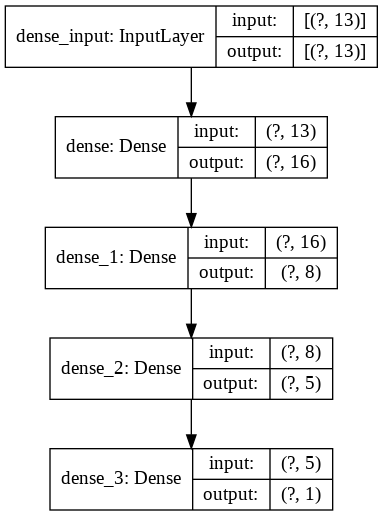

In [8]:
# Visualizing the model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [0]:
# Compiling the model
model.compile(optimizer='adam',
              loss='mse')

In [10]:
# Fitting the model to the training dataset
model.fit(X_train, y_train, batch_size=32, epochs=200, verbose=0)

In [11]:
# Evaluating the model
loss = model.evaluate(X_test, y_test)
print(f'MSE: {loss}\tRMSE: {loss**0.5}')

152/152 [==============================] - 0s 357us/sample - loss: 14.0742
MSE: 14.074204545272025	RMSE: 3.751560281439181


In [12]:
# Predicting from the test dataset
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(y_test.shape)
print(y_pred)

[28.541882  33.88426   26.786451  25.859486  16.84885   13.873019
 42.65216   15.457212  23.221214  42.60891   20.80309   27.929394
 28.762047  32.77929   31.057442  47.74181   24.404243  23.072186
 23.019056  21.520416  36.323788  13.590382  22.465176  23.781334
 32.50873   20.741129  17.74054   12.614577  39.734745  10.794898
 35.078632  31.580687  23.370895  25.72663   17.490776  16.94879
  5.400322  35.985973  26.359085  26.382462  40.387444  27.253529
 13.420387  31.387249  19.883703  22.865494  17.61567   22.111622
 44.004253  15.915014  22.246712  16.317406  20.301815  43.656094
 28.437038  33.722874  17.363808  19.597948  20.105463  23.752388
 19.048178  19.544636  46.74901   51.833126  30.089645  15.469807
 25.219257  10.446695  30.96751   38.630325  14.643571  28.856758
 19.194574  29.141205  25.629517  16.897236  48.843212   8.739052
 18.254723  28.775436  17.391312  22.794529  16.950695  24.429523
 31.60989   31.246983  26.886683  32.2042    23.177996   5.823508
 22.741264 